In [2]:
import ROOT
from ROOT import TFile, TH1F, TCanvas, TMath,TLine, TH1, TLegend
import copy
import array
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetBarWidth(1);
ROOT.gStyle.SetHistLineWidth(1);
import sys
sys.path.append("/eos/home-x/xuyan/TrijetProj/TrijetAna_Main/ZprimeAna/utiles")
from CMSStyle import CMS_lumi

Welcome to JupyROOT 6.30/02


In [ ]:
file1 = TFile(f"/eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/BuToKEE/myNano_0.root")
tree1 = file1.Get("Events")
hist1 = TH1F(f"hist1", "nBToKEE", 50, 0, 50)
tree1.Draw(f"nBToKEE>>hist1")
hist1.Scale(1.0/hist1.GetEntries())

file2 = TFile(f"/eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/BdToK0starEE_postEE_ext1/myNano_0.root")
tree2 = file2.Get("Events")
hist2 = TH1F(f"hist2", "nBToKEE", 50, 0, 50)
tree2.Draw(f"nBToKEE>>hist2")
hist2.Scale(1.0/hist2.GetEntries())

file3 = TFile(f"/eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/DataF_1707406646/myNano_0.root")
tree3 = file3.Get("Events")
hist3 = TH1F(f"hist3", "nBToKEE", 50, 0, 50)
tree3.Draw(f"nBToKEE>>hist3")
hist3.Scale(1.0/hist3.GetEntries())

hist1.SetLineWidth(2)
hist2.SetLineWidth(2)
hist3.SetLineWidth(2)

leg = TLegend(0.6,0.7,0.85,0.85)
canvas = TCanvas("canvas", "Title", 1000, 800)
canvas.cd()
hist1.Draw("HIST SAME")
hist2.SetLineColor(2)
hist2.Draw("HIST SAME")
hist3.SetLineColor(8)
hist3.Draw("HIST SAME")
leg.AddEntry(hist1,"Kee")
leg.AddEntry(hist2,"K*ee")
leg.AddEntry(hist3,"Data")
leg.Draw()
canvas.Draw()

In [18]:
file = TFile(f"Hist_KsEE_presel_lowq2_class3.root")
file.ls()

TFile**		Hist_KsEE_presel_lowq2_class3.root	
 TFile*		Hist_KsEE_presel_lowq2_class3.root	
  KEY: TH1F	hist1_1;1	B mass
  KEY: TH1F	hist1_2;1	ll mass
  KEY: TH1F	hist1_3;1	ll mass normalized
  KEY: TH1F	hist1_4;1	l1 p_{T}
  KEY: TH1F	hist1_5;1	l2 p_{T}
  KEY: TH1F	hist1_6;1	l1 p_{T} normalized
  KEY: TH1F	hist1_7;1	l2 p_{T} normalized
  KEY: TH1F	hist1_8;1	trk1 p_{T}
  KEY: TH1F	hist1_9;1	trk2 p_{T}
  KEY: TH1F	hist1_10;1	trk1 p_{T} normalized
  KEY: TH1F	hist1_11;1	trk2 p_{T} normalized
  KEY: TH1F	hist1_12;1	B p_{T}
  KEY: TH1F	hist1_13;1	B p_{T} normalized
  KEY: TH1F	hist1_14;1	cos #alpha_{3D}
  KEY: TH1F	hist1_15;1	Prob(SV fit)
  KEY: TH1F	hist1_16;1	sig(Lxy)
  KEY: TH1F	hist1_17;1	cos 2D fit
  KEY: TH1F	hist1_18;1	Momentum asymmetry ll-trk1
  KEY: TH1F	hist1_19;1	Momentum asymmetry ll-trk2
  KEY: TH1F	hist1_20;1	Momentum asymmetry ll-Ks
  KEY: TH1F	hist1_21;1	Impact parameter trk1
  KEY: TH1F	hist1_22;1	Impact parameter trk2
  KEY: TH1F	hist1_23;1	Isolation l1_iso04 normalized
  K

57327.0
hist_tri_class1
372245.0
hist_tri_class2
21056.0
hist_tri_class3
392913.0
hist_tri_class4_dataSB
40799.0
hist_quad_class1
14420.0
hist_quad_class2
4957.0
hist_quad_class3
24457.0
hist_quad_class4_dataSB


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


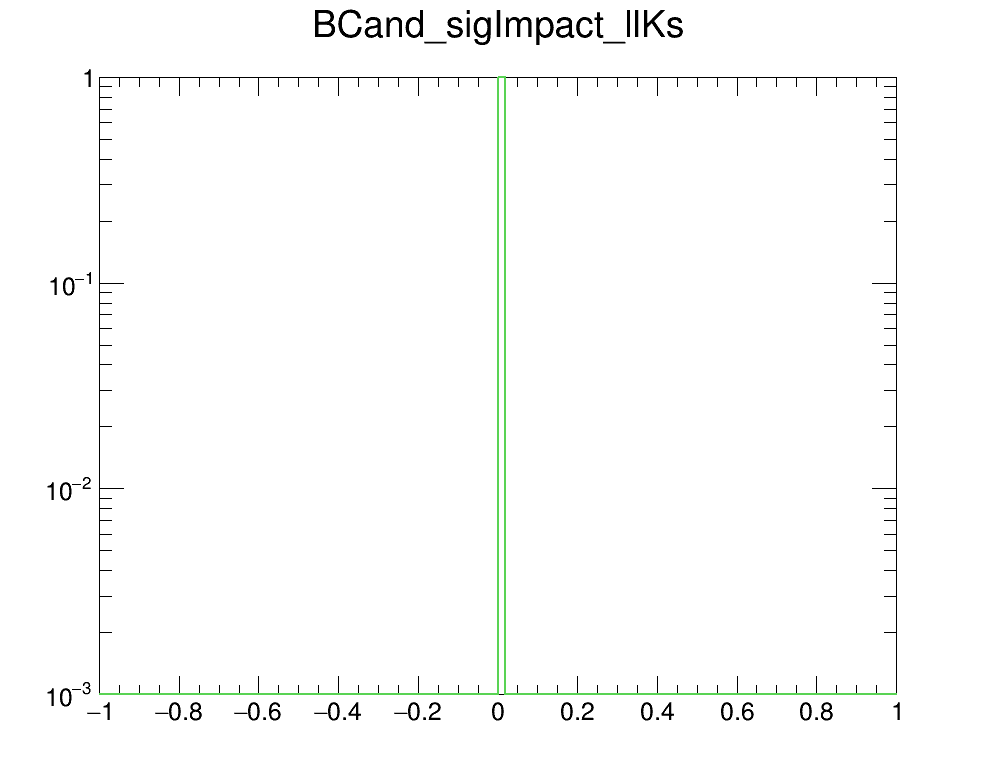

In [4]:
linestyle = {
    "tri": 1,
    "quad": 2,
}

linecolor = {
    "class1": 1,
    "class2": 2,
    "class3": 4,
    "class4_dataSB": 8,
#     "class4_dataSB": 6
}
hist_list = []
canvas = TCanvas("canvas", "Title", 1000, 800)
canvas.cd()
for s in ["tri","quad"]:
    for c in ["class1","class2","class3","class4_dataSB"]:
# for s in ["triplets","quadruplets"]:
#     for c in ["class4","class4_data"]:
        file = TFile(f"Tree_{s}_presel_lowq2_{c}.root")
        tree = file.Get("Events")
        hist = TH1F(f"hist_{s}_{c}", "BCand_sigImpact_llKs",100, -1,1 )
        hist.SetLineColor(linecolor[c])
        hist.SetLineStyle(linestyle[s])
        hist.SetLineWidth(2)
        tree.Draw(f"BCand_sigImpact_llKs>>hist_{s}_{c}")
        if hist.Integral() > 0:  # Check if the histogram is not empty
            print(hist.GetEntries())
            hist.Scale(1.0 / hist.Integral())
        hist_list.append(copy.deepcopy(hist))
        print(hist_list[-1].GetName())
        
for hist in hist_list:
    hist.GetYaxis().SetRangeUser(0.001,1)
    hist.Draw("HIST SAME")

canvas.SetLogy()
canvas.Draw()

In [ ]:
file1 = TFile.Open(f"/eos/home-x/xuyan/RKProj/RKAnalyzer/KStarllStudy/Data/BuToKEE/myNano_0.root")
file1.ls()
# hist1 = file1.Get(f"hist1_4")
tree = file1.Get("Events")
# tree.Print()

# canvas = TCanvas("canvas", "Title", 1000, 800)
# canvas.cd()
# hist1.Draw()
# canvas.Draw()

In [19]:
hist1_dic = {
    "tri_class1":[],
    "tri_class2":[],
    "tri_class3":[],
    "tri_class4_dataSB":[],
    "quad_class1":[],
    "quad_class2":[],
    "quad_class3":[],
    "quad_class4_dataSB":[],
}
for s in ["tri","quad"]:
    for c in ["class1","class2","class3","class4_dataSB"]:
        print(f"Hist_{s}_presel_lowq2_{c}.root")
        file = TFile(f"Hist_{s}_presel_lowq2_{c}.root")
#         file.ls()
        for i in range(1,42):
            hist = file.Get(f"hist1_{i}")
            if i<40:
                hist.Rebin(10)
#             print(i, s, c, hist.GetEntries())
            hist.Scale(1.0/hist.GetEntries())
            hist1_dic[f"{s}_{c}"].append(copy.deepcopy(hist))

Hist_tri_presel_lowq2_class1.root
Hist_tri_presel_lowq2_class2.root
Hist_tri_presel_lowq2_class3.root
Hist_tri_presel_lowq2_class4_dataSB.root
Hist_quad_presel_lowq2_class1.root
Hist_quad_presel_lowq2_class2.root
Hist_quad_presel_lowq2_class3.root
Hist_quad_presel_lowq2_class4_dataSB.root


B mass
ll mass normalized
l1 p_{T}
l2 p_{T}
l1 p_{T} normalized
l2 p_{T} normalized
trk1 p_{T}
trk2 p_{T}
trk1 p_{T} normalized
trk2 p_{T} normalized
B p_{T}
B p_{T} normalized
cos #alpha_{3D}
Prob(SV fit)
sig(Lxy)
cos 2D fit
Momentum asymmetry ll-trk1
Momentum asymmetry ll-trk2
Momentum asymmetry ll-Ks
Impact parameter trk1
Impact parameter trk2
Isolation l1_iso04 normalized
Isolation l2_iso04 normalized
Isolation trk1_iso04 normalized
Isolation trk2_iso04 normalized
#Delta R (ll)
#Delta R (l1-trk1)
#Delta R (l1-trk2)
#Delta R (l2-trk1)
#Delta R (l2-trk2)
#Delta R (trk-trk)
#Delta z (l1-trk1)
#Delta z (l1-trk2)
#Delta z (l2-trk1)
#Delta z (l2-trk2)
#Delta z (trk-trk)
l1 ID
l2 ID
nTriplets
nQuadruplets
B mass
ll mass normalized
l1 p_{T}
l2 p_{T}
l1 p_{T} normalized
l2 p_{T} normalized
trk1 p_{T}
trk2 p_{T}
trk1 p_{T} normalized
trk2 p_{T} normalized
B p_{T}
B p_{T} normalized
cos #alpha_{3D}
Prob(SV fit)
sig(Lxy)
cos 2D fit
Momentum asymmetry ll-trk1
Momentum asymmetry ll-trk2
Momentum

Info in <TCanvas::Print>: png file var.png has been created
Info in <TCanvas::Print>: pdf file var.pdf has been created


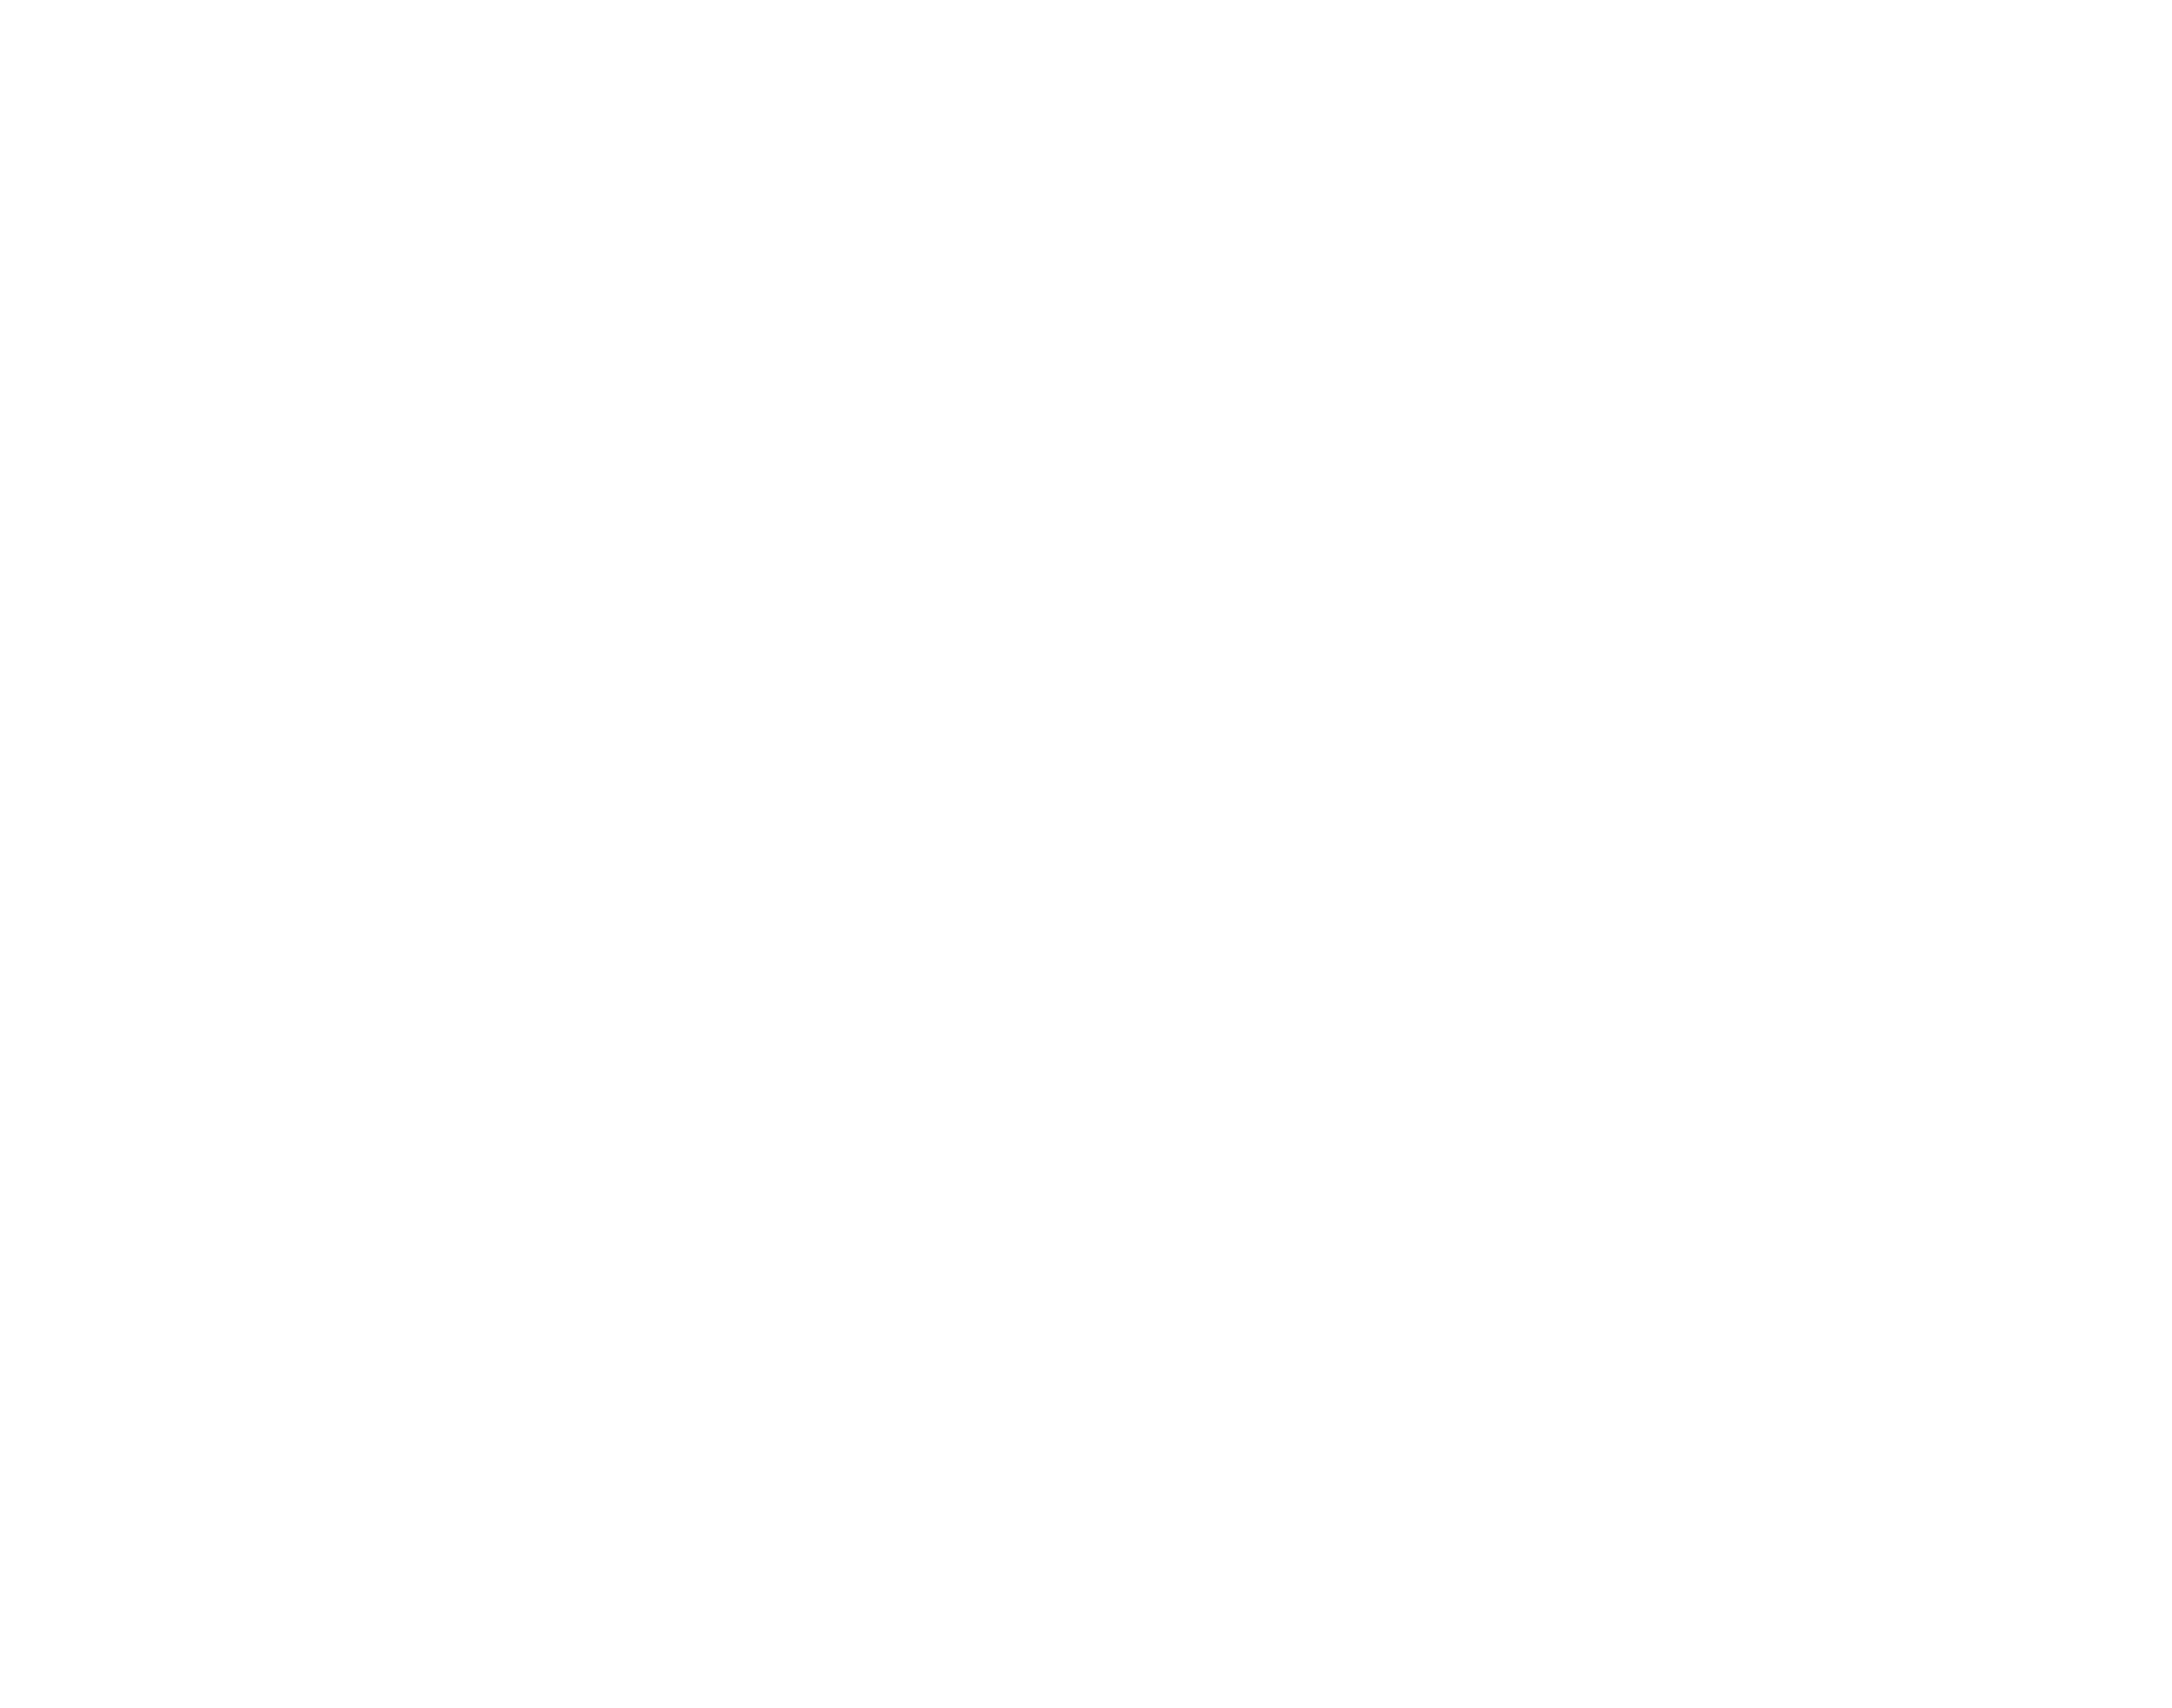

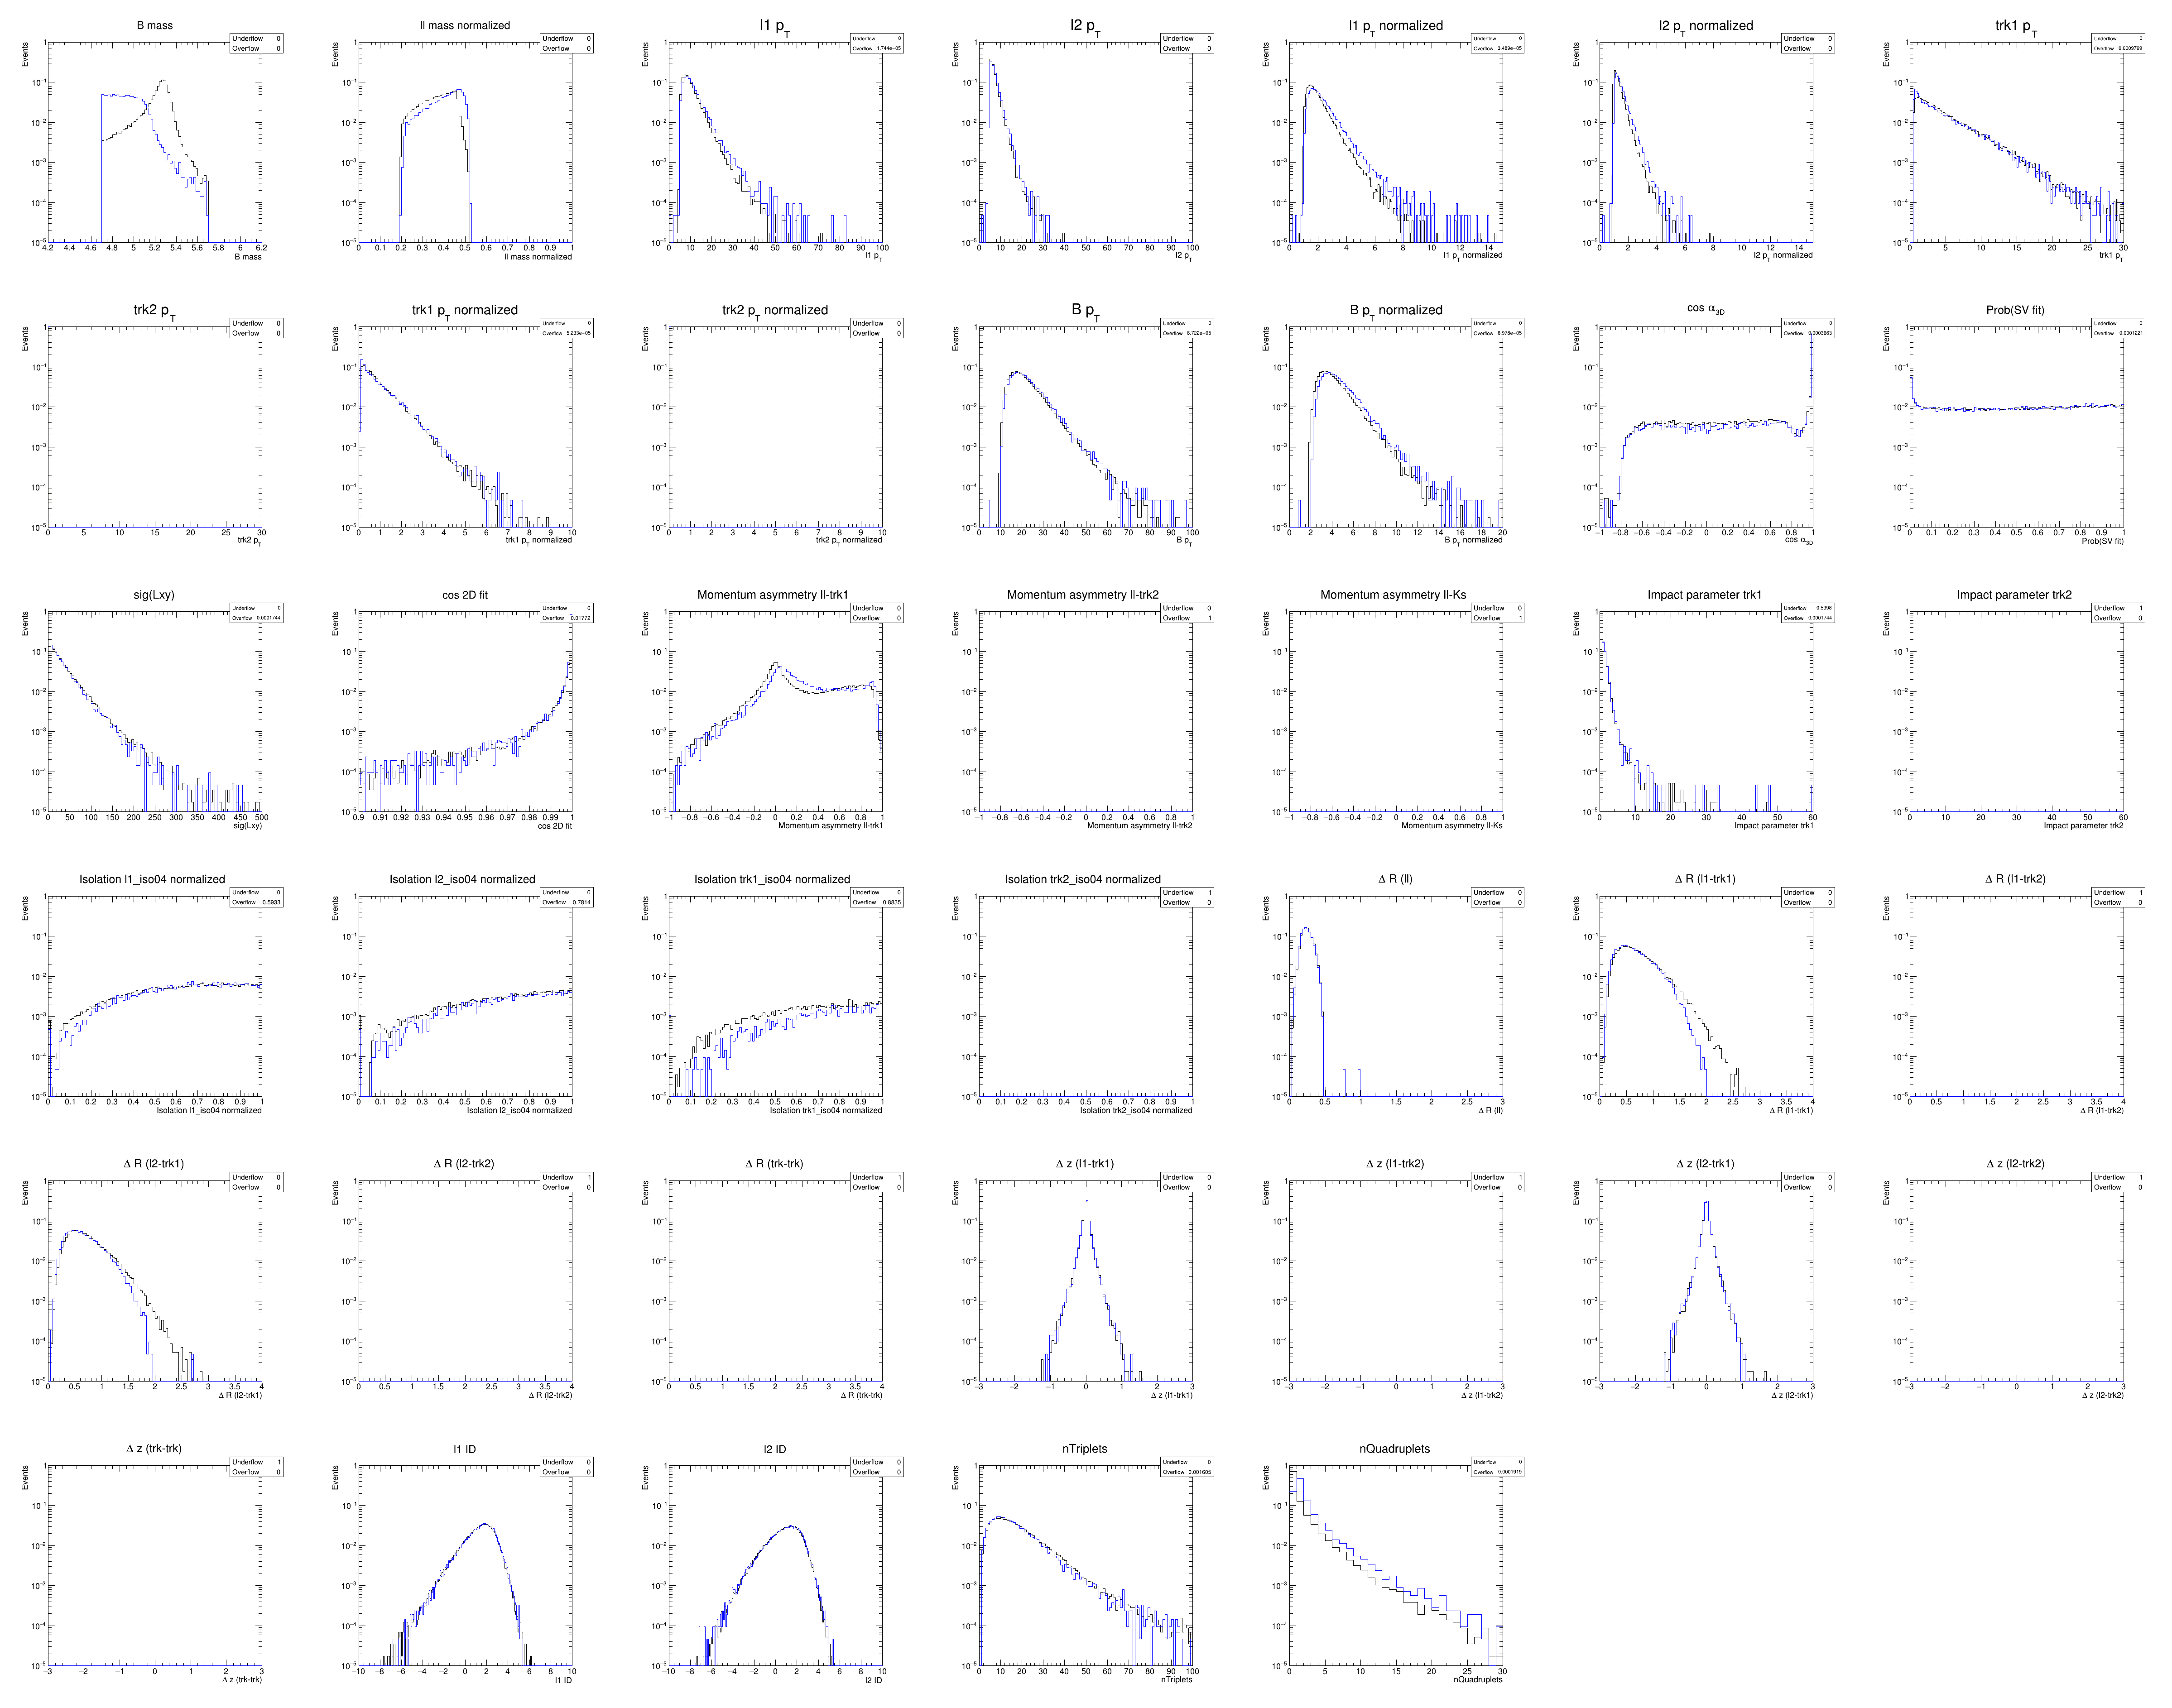

In [20]:
def draw(c0, hist, xTitle, ipad):
    c0.cd(ipad)
    hist.GetYaxis().SetTitle("Events")
    hist.GetYaxis().SetTitleOffset(1.6)
    hist.GetYaxis().SetRangeUser(0.00001,1)
#     hist.GetYaxis().SetRangeUser(0.0000,0.3)
    hist.GetXaxis().SetTitle(xTitle)
    hist.SetTitle(hist.GetTitle())
    hist.SetLineWidth(1)
    hist.Draw("SAME HIST")
    
    gPad.SetLogy()
    
from ROOT import gStyle, TLegend, TPad, gPad
gStyle.SetOptStat(110000)
c0 = TCanvas("","",4800,3800)
c0.cd()
c0.Divide(7,6)

# variable_names = [
#     "m_{B} [GeV]",
#     "m_{ll} [GeV]",
#     "p_{T}^{e1} [GeV]",
#     "p_{T}^{e2} [GeV]",
#     "p_{T}^{e1} (normalized)",
#     "p_{T}^{e2} (normalized)",
#     "p_{T}^{K} [GeV]",
#     "p_{T}^{K} (normalized)",
#     "p_{T}^{B} [GeV]",
#     "p_{T}^{B} (normalized)",
#     "cos #alpha_{3D}",
#     "Probability",
#     "Sig(Lxy)",
#     "#Delta z (e1, K)",
#     "#Delta z (e2, K)",
#     "SigImpactParam(K, ll)",
#     "#Delta R (ee)",
#     "#Delta R (e1, K)",
#     "#Delta R (e2, K)",
#     "Momentum asymmetry",
#     "Electron ID e1",
#     "Electron ID e2",
#     "Isolation l1_iso04_dca [GeV]",
#     "Isolation l1_iso04_dca [GeV]",
#     "Isolation l1_iso04_dca [GeV]"
# ]

linestyle = {
    "tri": 1,
    "quad": 2,
}

linecolor = {
    "class1": 1,
    "class2": 2,
    "class3": 4,
    "class4_dataSB": 8,
}

for i, s in enumerate(["tri"]):
    for j, c in enumerate(["class1","class3"]):
# for i, s in enumerate(["tri","quad"]):
#     for j, c in enumerate(["class1","class2","class3","class4_dataSB"]):
        for k, hist in enumerate(hist1_dic[f"{s}_{c}"]):
            if k == 1: continue
            print(hist.GetTitle())
            hist.SetLineColor(linecolor[c])
            hist.SetLineStyle(linestyle[s])
            hist.SetLineWidth(2)
#             print(hist.GetEntries())
            if k < 1:
                draw(c0, hist, hist.GetTitle(), k+1)
            else:
                draw(c0, hist, hist.GetTitle(), k)

c0.Draw()
c0.Print("var.png")
c0.Print("var.pdf")

In [ ]:
from ROOT import gStyle, TLegend
gStyle.SetOptStat(0)
c0 = TCanvas("","",1200,900)
c0.cd()

leg = TLegend(0.7, 0.8, 0.9, 0.9)

leg.AddEntry(hist1_1, "B (all triplets)", "l")
leg.AddEntry(hist1_3, "B (cleaned triplets)", "l")

hist1_1.SetLineColor(4)
hist1_3.SetLineColor(2)

hist1_1.GetYaxis().SetTitle("Events")
hist1_1.GetYaxis().SetTitleOffset(1.6)
hist1_1.GetYaxis().SetRangeUser(0,2000)
# hist5.GetYaxis().SetRangeUser(0,6000)
hist1_1.GetXaxis().SetRangeUser(3.5,7)
hist1_1.GetXaxis().SetTitle("m_{B} [GeV]")
hist1_1.SetTitle("")

hist1_1.Draw("SAME")
hist1_3.Draw("SAME")

leg.Draw()

# c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1200,900)
c0.cd()

leg = TLegend(0.1, 0.8, 0.4, 0.9)

leg.AddEntry(hist1_KEE_list[1], "triplets (KEE)", "l")
leg.AddEntry(hist1_K0StarEE_list[1], "triplets (K0StarEE)", "l")

hist1_KEE_list[1].SetLineColor(4)
hist1_K0StarEE_list[1].SetLineColor(2)

hist1_KEE_list[1].GetYaxis().SetTitle("Events")
hist1_KEE_list[1].GetYaxis().SetTitleOffset(1.6)
hist1_KEE_list[1].GetYaxis().SetRangeUser(0.0000001,1)
# hist5.GetYaxis().SetRangeUser(0,6000)
# hist5.GetXaxis().SetRangeUser(, 4.4)
hist1_KEE_list[1].GetXaxis().SetTitle("m_{ee} [GeV]")
hist1_KEE_list[1].SetTitle(hist1_KEE_list[1].GetTitle())

hist1_KEE_list[1].Draw("HIST")
hist1_K0StarEE_list[1].Draw("HIST SAME")

leg.Draw()

c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1200,900)
c0.cd()
leg = TLegend(0.1, 0.8, 0.4, 0.9)
leg.AddEntry(hist2_KEE_list[0], "quadruplets (KEE)", "l")
leg.AddEntry(hist2_K0StarEE_list[0], "quadruplets (K0StarEE)", "l")
hist2_KEE_list[0].GetYaxis().SetTitle("Events")
hist2_KEE_list[0].GetYaxis().SetTitleOffset(1.6)
hist2_KEE_list[0].GetYaxis().SetRangeUser(0.00001,1)
hist2_KEE_list[0].GetXaxis().SetTitle("m_{B} [GeV]")
hist2_KEE_list[0].SetTitle(hist2_KEE_list[0].GetTitle())
hist2_KEE_list[0].SetLineColor(2)
hist2_KEE_list[0].Draw("HIST")
hist2_K0StarEE_list[0].Draw("HIST SAME")
leg.Draw()
c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1200,900)
c0.cd()

leg = TLegend(0.8, 0.8, 0.9, 0.9)

leg.AddEntry(hist2_2, "K*", "l")

hist2_2.SetLineColor(2)

hist2_2.GetYaxis().SetTitle("Events")
hist2_2.GetYaxis().SetTitleOffset(1.6)
hist2_2.GetYaxis().SetRangeUser(0,2000)
hist2_2.GetXaxis().SetRangeUser(0.6,1.2)
hist2_2.GetXaxis().SetTitle("m_{K*} [GeV]")
hist2_2.SetTitle("")

hist2_2.Draw("SAME")

leg.Draw()

# c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1200,900)
c0.cd()

leg = TLegend(0.8, 0.8, 0.9, 0.9)

leg.AddEntry(hist1_5, "l1", "l")
leg.AddEntry(hist1_6, "l2", "l")

hist1_5.SetLineColor(2)
hist1_6.SetLineColor(4)

hist1_5.GetYaxis().SetTitle("Events")
hist1_5.GetYaxis().SetTitleOffset(1.6)
hist1_5.GetYaxis().SetRangeUser(0,200)
# hist1_5.GetXaxis().SetRangeUser(0,5)
hist1_5.GetXaxis().SetTitle("pT [GeV]")
hist1_5.SetTitle("")

hist1_5.Draw("SAME")
hist1_6.Draw("SAME")

leg.Draw()

# c0.SetLogy()
c0.Draw()

In [ ]:
c0 = TCanvas("","",1600,900)
c0.cd()

hist2d_KEE_list[0].GetXaxis().SetTitle("L1")
hist2d_KEE_list[0].GetYaxis().SetTitle("HLT")
hist2d_KEE_list[0].SetTitle("")

hist2d_KEE_list[0].Draw("colorz text")

c0.SetLogz()
c0.Draw()